In [1]:
#import pandas
import pandas as pd

#import numpy
import numpy as np

#import matplotlibib
import matplotlib.pyplot as plt

#import seaborn
import seaborn as sns

In [2]:
df_depression= pd.read_csv('depression_data_reduced.csv')

In [3]:
df_depression.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Raymond Ryan,39,Divorced,High School,3,Non-smoker,Sedentary,Employed,35061.68,Low,Unhealthy,Fair,No,No,Yes,No
1,Heather King,61,Widowed,High School,2,Non-smoker,Sedentary,Unemployed,26651.65,Moderate,Unhealthy,Fair,Yes,No,No,Yes
2,Ryan Chambers,29,Single,Associate Degree,0,Current,Sedentary,Employed,37534.30,Low,Unhealthy,Good,No,Yes,No,No
3,Riley Mata,22,Single,Bachelor's Degree,0,Former,Active,Employed,58159.44,Low,Healthy,Good,No,No,No,Yes
4,Monica Brown,21,Single,Bachelor's Degree,0,Former,Active,Unemployed,28167.44,High,Healthy,Fair,Yes,No,No,No


In [4]:
df_depression.tail()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
99995,Nathan Gonzales,45,Married,Bachelor's Degree,3,Non-smoker,Sedentary,Employed,88901.50,High,Unhealthy,Fair,No,No,No,No
99996,Helen Adams,65,Married,Associate Degree,3,Former,Moderate,Employed,51856.07,Low,Moderate,Poor,Yes,No,Yes,Yes
99997,Eric Patrick,26,Married,Bachelor's Degree,1,Non-smoker,Sedentary,Employed,75829.92,High,Unhealthy,Poor,No,No,No,No
99998,Michael Gomez,57,Married,Bachelor's Degree,0,Non-smoker,Active,Unemployed,28615.08,High,Healthy,Good,Yes,Yes,No,Yes
99999,Jennifer Koch,76,Widowed,Bachelor's Degree,2,Non-smoker,Moderate,Employed,82425.00,High,Healthy,Good,No,No,No,Yes


In [5]:
df_depression.shape

(100000, 16)

**Interpretation**
- we have 100000 Observation (rows)
- we have 16 attributes (columns)

In [6]:
df_depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          100000 non-null  object 
 1   Age                           100000 non-null  int64  
 2   Marital Status                100000 non-null  object 
 3   Education Level               100000 non-null  object 
 4   Number of Children            100000 non-null  int64  
 5   Smoking Status                100000 non-null  object 
 6   Physical Activity Level       100000 non-null  object 
 7   Employment Status             100000 non-null  object 
 8   Income                        100000 non-null  float64
 9   Alcohol Consumption           100000 non-null  object 
 10  Dietary Habits                100000 non-null  object 
 11  Sleep Patterns                100000 non-null  object 
 12  History of Mental Illness     100000 non-null

In [7]:
df_depression.Name.unique()

array(['Raymond Ryan', 'Heather King', 'Ryan Chambers', ...,
       'Helen Adams', 'Eric Patrick', 'Jennifer Koch'], dtype=object)

In [8]:
#drop 'Name'column because it has all the unique values 
df_depression.drop(columns=['Name'], inplace=True,axis=1)

In [9]:
df_depression.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,39,Divorced,High School,3,Non-smoker,Sedentary,Employed,35061.68,Low,Unhealthy,Fair,No,No,Yes,No
1,61,Widowed,High School,2,Non-smoker,Sedentary,Unemployed,26651.65,Moderate,Unhealthy,Fair,Yes,No,No,Yes
2,29,Single,Associate Degree,0,Current,Sedentary,Employed,37534.30,Low,Unhealthy,Good,No,Yes,No,No
3,22,Single,Bachelor's Degree,0,Former,Active,Employed,58159.44,Low,Healthy,Good,No,No,No,Yes
4,21,Single,Bachelor's Degree,0,Former,Active,Unemployed,28167.44,High,Healthy,Fair,Yes,No,No,No


In [10]:
df_depression.shape

(100000, 15)

In [11]:
df_depression.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,49.093030,18.190601,18.00,33.0000,49.000,65.00,80.00
Number of Children,100000.0,1.299620,1.236205,0.00,0.0000,1.000,2.00,4.00
Income,100000.0,50595.977933,40510.360823,0.41,21028.8225,37545.425,76283.42,209995.22


**interpretation**
- Column Income has a significant difference between the mean and median, so there exist Outliers

#### Outliers Handling

In [12]:
# Remove outliers from Income column
Q1 = df_depression["Income"].quantile(0.25)
Q3 = df_depression["Income"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df_depression[(df_depression["Income"] >= lower_bound) & (df_depression["Income"] <= upper_bound)]

print("Original dataset size:", len(df_depression))
print("Dataset size after removing outliers:", len(df))

Original dataset size: 100000
Dataset size after removing outliers: 98763


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98763 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           98763 non-null  int64  
 1   Marital Status                98763 non-null  object 
 2   Education Level               98763 non-null  object 
 3   Number of Children            98763 non-null  int64  
 4   Smoking Status                98763 non-null  object 
 5   Physical Activity Level       98763 non-null  object 
 6   Employment Status             98763 non-null  object 
 7   Income                        98763 non-null  float64
 8   Alcohol Consumption           98763 non-null  object 
 9   Dietary Habits                98763 non-null  object 
 10  Sleep Patterns                98763 non-null  object 
 11  History of Mental Illness     98763 non-null  object 
 12  History of Substance Abuse    98763 non-null  object 
 13  Family

In [14]:
df.shape

(98763, 15)

In [15]:
df.isnull().sum()

Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

In [16]:
df.isnull().sum()/len(df)*100

Age                             0.0
Marital Status                  0.0
Education Level                 0.0
Number of Children              0.0
Smoking Status                  0.0
Physical Activity Level         0.0
Employment Status               0.0
Income                          0.0
Alcohol Consumption             0.0
Dietary Habits                  0.0
Sleep Patterns                  0.0
History of Mental Illness       0.0
History of Substance Abuse      0.0
Family History of Depression    0.0
Chronic Medical Conditions      0.0
dtype: float64

**Interpretation**
- We have total 3 numberical columns and 12 categorial columns
- Memory usage is 12.1+ MB we does not require extra resources
- After observing output we can say there are no missing records are there in the data

# Univariate analysis

In [17]:
# Segregate the data based on datatypes
df_num = df.select_dtypes(include ='number') #Numerical data Frame
df_cat = df.select_dtypes(include ='object') #catagorical data Frame

In [18]:
df_num.head()

,Age,Number of Children,Income
0,39,3,35061.68
1,61,2,26651.65
2,29,0,37534.30
3,22,0,58159.44
4,21,0,28167.44


In [19]:
df_cat.head()

,Marital Status,Education Level,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Divorced,High School,Non-smoker,Sedentary,Employed,Low,Unhealthy,Fair,No,No,Yes,No
1,Widowed,High School,Non-smoker,Sedentary,Unemployed,Moderate,Unhealthy,Fair,Yes,No,No,Yes
2,Single,Associate Degree,Current,Sedentary,Employed,Low,Unhealthy,Good,No,Yes,No,No
3,Single,Bachelor's Degree,Former,Active,Employed,Low,Healthy,Good,No,No,No,Yes
4,Single,Bachelor's Degree,Former,Active,Unemployed,High,Healthy,Fair,Yes,No,No,No


### Perform the Univariate analysis on numerical data

In [20]:
df_num.columns

Index(['Age', 'Number of Children', 'Income'], dtype='object')

#### Age

In [21]:
#show the minimum value
df_num.Age.min()

18

In [22]:
#show the maximum value
df_num.Age.max()

80

In [23]:
#show the average of Age
df_num.Age.mean().round(3)

49.041

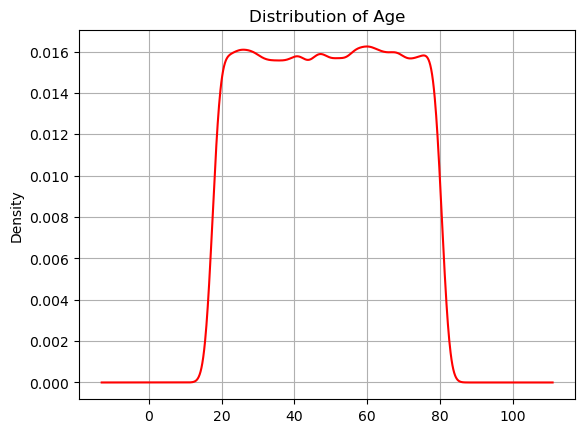

In [24]:
# show the distribution of the single numerical column
df_num.Age.plot(kind = 'kde',color = 'red') #kernel density plot
plt.grid()
plt.title('Distribution of Age')
plt.show()

**Interpretation**  
- Minimum age of the person is 18.  
- Maximum age of the person is 80.  
- Average age of the person is 49.09.  
- The data follows the multimodel distribution (range is from 20 to 80)

In [25]:
df_num.columns

Index(['Age', 'Number of Children', 'Income'], dtype='object')

#### Number of Children

In [26]:
#show the minimum value
df_num['Number of Children'].min()

0

In [27]:
#show the maximum value
df_num['Number of Children'].max()

4

In [28]:
#show the average of Age
df_num['Number of Children'].mean().round(3)

1.296

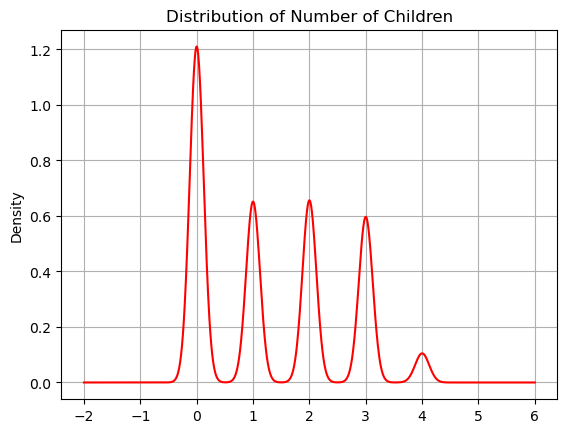

In [29]:
# show the distribution of the single numerical column
df_num['Number of Children'].plot(kind = 'kde',color = 'red') #kernel density plot
plt.grid()
plt.title('Distribution of Number of Children')
plt.show()

 **Interpretation**
 - Mininumber of childerns a person have is 0
 - Maximum number of childern a person have is 4
 - Average of a person having number of children is around 2
 - The data follows multimodel distribution
 - The data have discrete values of ranges between 0 to 4.
 

In [30]:
df_num.columns

Index(['Age', 'Number of Children', 'Income'], dtype='object')

#### Income

In [31]:
#show the minimum value
df_num.Income.min()

0.41

In [32]:
#show the maximum value
df_num.Income.max()

159097.52

In [33]:
#show the average of Age
df_num.Income.mean().round(3)

48923.365

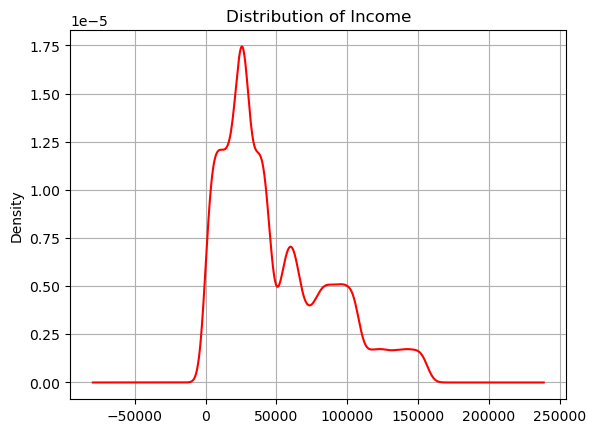

In [34]:
# show the distribution of the single numerical column
df_num.Income.plot(kind = 'kde',color = 'red') #kernel density plot
plt.grid()
plt.title('Distribution of Income')
plt.show()

**Interpretation**  
- Minimum income of people is 0.41.  
- Maximum income of people is 209,995.  
- Average income of people is 50,595.
- The Data is righted skewed and multi model
- it could be ranged from 0 to 100000 and 100000 to 200000

### Univariate Analysis on categorical data

In [35]:
# show the first five observation of categorical data
df_cat.head()

,Marital Status,Education Level,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Divorced,High School,Non-smoker,Sedentary,Employed,Low,Unhealthy,Fair,No,No,Yes,No
1,Widowed,High School,Non-smoker,Sedentary,Unemployed,Moderate,Unhealthy,Fair,Yes,No,No,Yes
2,Single,Associate Degree,Current,Sedentary,Employed,Low,Unhealthy,Good,No,Yes,No,No
3,Single,Bachelor's Degree,Former,Active,Employed,Low,Healthy,Good,No,No,No,Yes
4,Single,Bachelor's Degree,Former,Active,Unemployed,High,Healthy,Fair,Yes,No,No,No


In [36]:
df_cat.columns

Index(['Marital Status', 'Education Level', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

#### Marital Status

In [37]:
# find the count
df_cat['Marital Status'].value_counts()

Marital Status
Married     57291
Single      17398
Widowed     16344
Divorced     7730
Name: count, dtype: int64

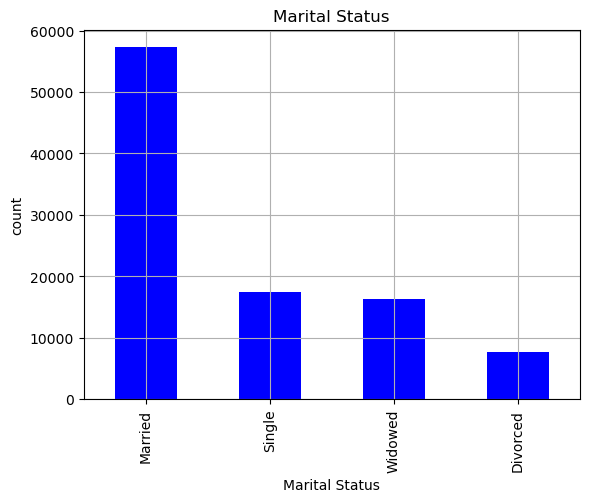

In [38]:
# show the plot
df_cat['Marital Status'].value_counts().plot(kind='bar',color='blue')
plt.grid()
plt.title('Marital Status')
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.show()

**Interpretation**

- 58,109 people are married.
- 17,454 people are single.
- 16,585 people are widowed.
- 7,852 people are divorced.

In [39]:
df_cat.columns

Index(['Marital Status', 'Education Level', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

#### Education Level

In [40]:
# find the count
df_cat['Education Level'].value_counts()

Education Level
Bachelor's Degree    30080
High School          28755
Associate Degree     19272
Master's Degree      17869
PhD                   2787
Name: count, dtype: int64

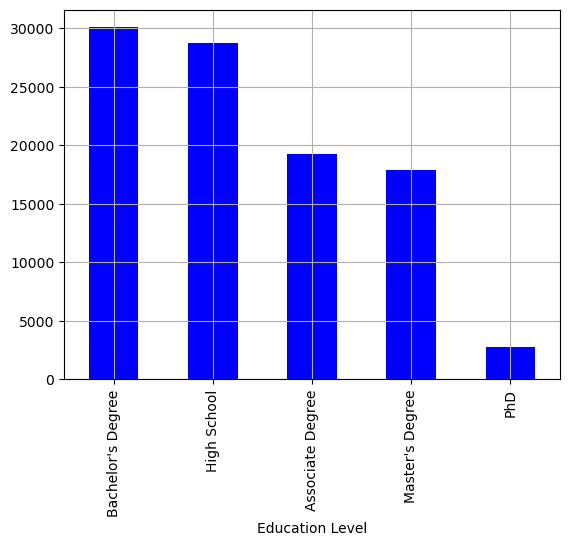

In [41]:
df_cat['Education Level'].value_counts().plot(kind='bar',color='blue')
plt.grid()
plt.xticks(rotation =90)
plt.show()

**Interpretation**

- 30,080 people have a Bachelor's degree.
- 28,755 people have completed high school.
- 19,272 people hold an Associate degree.
- 17,869 people have a Master's degree.
- 4,024 people have a PhD.

In [42]:
df_cat.columns

Index(['Marital Status', 'Education Level', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

#### Smoking Status

In [43]:
df_cat['Smoking Status'].value_counts()

Smoking Status
Non-smoker    59243
Former        27452
Current       12068
Name: count, dtype: int64

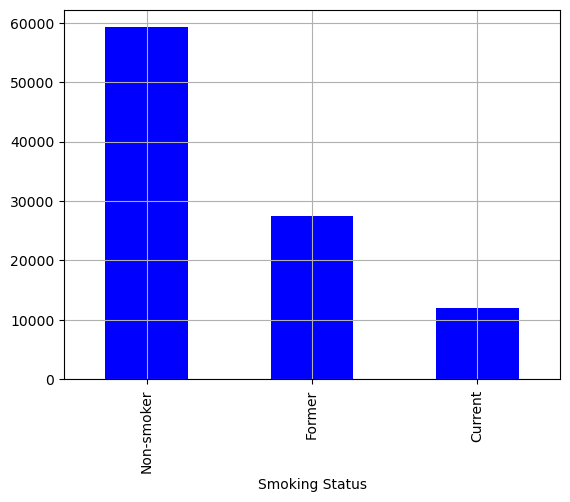

In [44]:
df_cat['Smoking Status'].value_counts().plot(kind ='bar',color= 'blue')
plt.grid()
plt.xticks(rotation = 90)
plt.show()

**Interpretation**  
- 59,999 people are non-smokers.  
- 27,825 people are former smokers.  
- 12,176 people are current smokers.  


In [45]:
df_cat.columns

Index(['Marital Status', 'Education Level', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

#### Physical Activity Level

In [46]:
df_cat['Physical Activity Level'].value_counts()

Physical Activity Level
Sedentary    42271
Moderate     37580
Active       18912
Name: count, dtype: int64

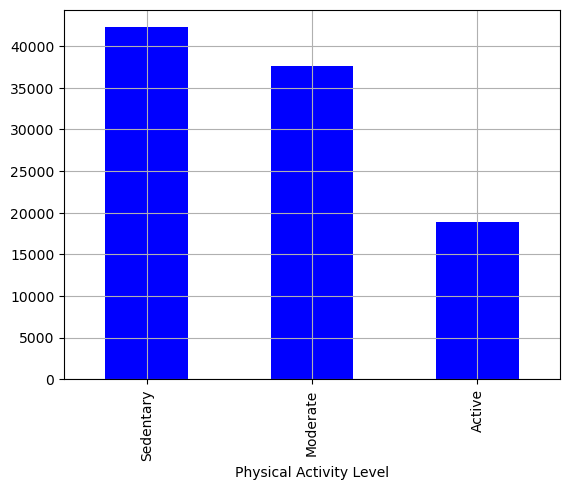

In [47]:
df_cat['Physical Activity Level'].value_counts().plot(kind = 'bar',color = 'blue')
plt.grid()
plt.xticks(rotation = 90)
plt.show()

**Interpretation**  
- 42,854 people are sedentary.  
- 38,083 people engage in moderate physical activity.  
- 19,063 people are active.  

In [48]:
df_cat.columns

Index(['Marital Status', 'Education Level', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

#### Employment Status

In [49]:
df_cat['Employment Status'].value_counts()

Employment Status
Employed      62996
Unemployed    35767
Name: count, dtype: int64

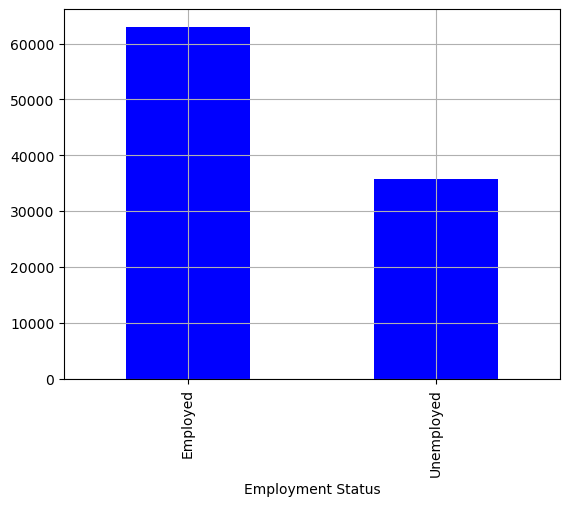

In [50]:
df_cat['Employment Status'].value_counts().plot(kind = 'bar',color = 'blue')
plt.grid()
plt.xticks(rotation = 90)
plt.show()

**Interpretation**  
- 64,233 people are employed.  
- 35,767 people are unemployed.  

In [51]:
df_cat.columns

Index(['Marital Status', 'Education Level', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

#### Alcohol Consumption

In [52]:
df_cat['Alcohol Consumption'].value_counts()

Alcohol Consumption
Moderate    41232
Low         33218
High        24313
Name: count, dtype: int64

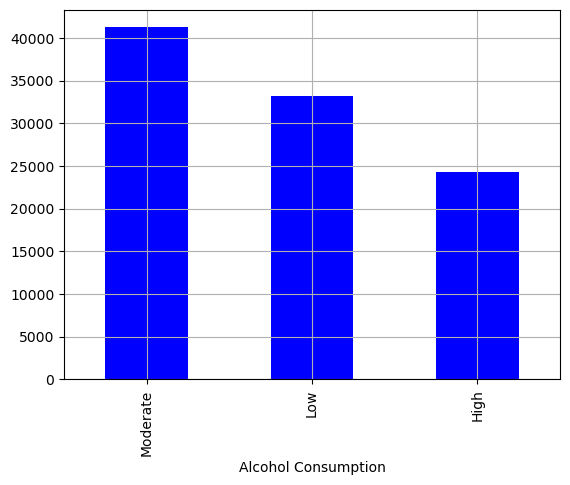

In [53]:
df_cat['Alcohol Consumption'].value_counts().plot(kind = 'bar',color = 'blue')
plt.grid()
plt.xticks(rotation = 90)
plt.show()

**Interpretation**  
- 41,768 people have moderate alcohol consumption.  
- 33,609 people have low alcohol consumption.  
- 24,623 people have high alcohol consumption.  

In [54]:
df_cat.columns

Index(['Marital Status', 'Education Level', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

### Dietary Habits

In [55]:
df_cat['Dietary Habits'].value_counts()

Dietary Habits
Moderate     40872
Unhealthy    40756
Healthy      17135
Name: count, dtype: int64

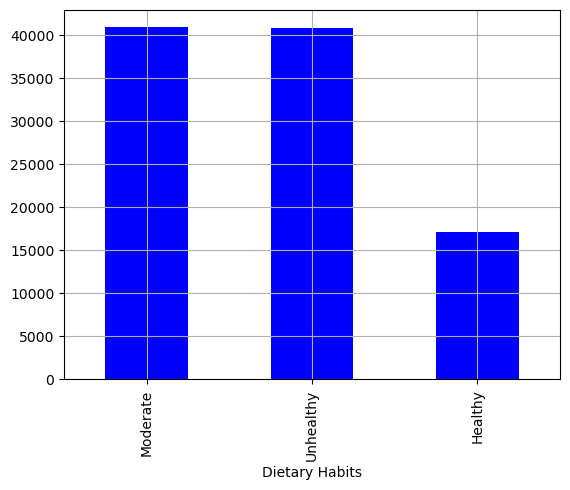

In [56]:
df_cat['Dietary Habits'].value_counts().plot(kind = 'bar',color = 'blue')
plt.grid()
plt.xticks(rotation = 90)
plt.show()

**Interpretation**  
- 41,339 people have moderate dietary habits.  
- 41,137 people have unhealthy dietary habits.  
- 17,524 people have healthy dietary habits.  

In [57]:
df_cat.columns

Index(['Marital Status', 'Education Level', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

### Sleep Patterns

In [58]:
df_cat['Sleep Patterns'].value_counts()

Sleep Patterns
Fair    46756
Poor    30968
Good    21039
Name: count, dtype: int64

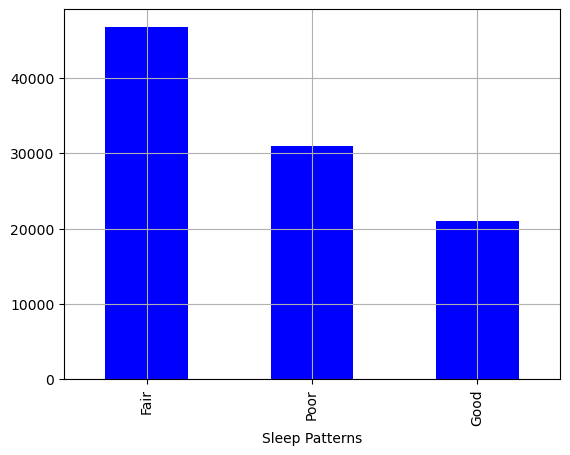

In [59]:
df_cat['Sleep Patterns'].value_counts().plot(kind ='bar', color='blue')
plt.grid()
plt.xticks(rotation =90)
plt.show()

**Interpretation**  
- 47,349 people have fair sleep patterns.  
- 31,270 people have poor sleep patterns.  
- 21,381 people have good sleep patterns.  

In [60]:
df_cat.columns

Index(['Marital Status', 'Education Level', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

#### History of Mental Illness

In [61]:
df_cat['History of Mental Illness'].value_counts()

History of Mental Illness
No     68430
Yes    30333
Name: count, dtype: int64

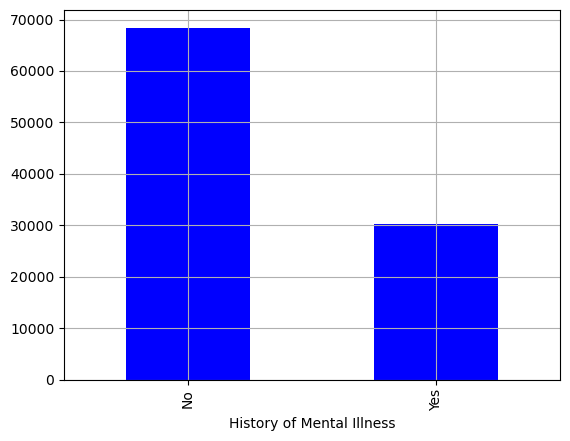

In [62]:
df_cat['History of Mental Illness'].value_counts().plot(kind ='bar', color='blue')
plt.grid()
plt.xticks(rotation =90)
plt.show()

**Interpretation**  
- 69,419 people have no history of mental illness.  
- 30,581 people have a history of mental illness.  

#### History of Substance Abuse

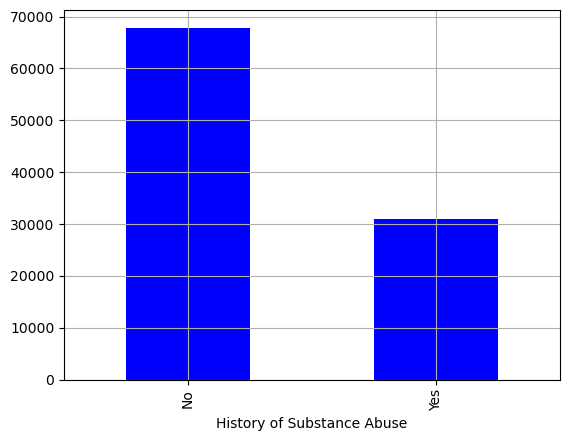

In [63]:
df_cat['History of Substance Abuse'].value_counts().plot(kind ='bar', color='blue')
plt.grid()
plt.xticks(rotation =90)
plt.show()

**Interpretation**  
- 68,729 people have no history of substance abuse.  
- 31,271 people have a history of substance abuse.  

In [64]:
df_cat.columns

Index(['Marital Status', 'Education Level', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

### Family History of Depression

In [65]:
df_cat['Family History of Depression'].value_counts()

Family History of Depression
No     72144
Yes    26619
Name: count, dtype: int64

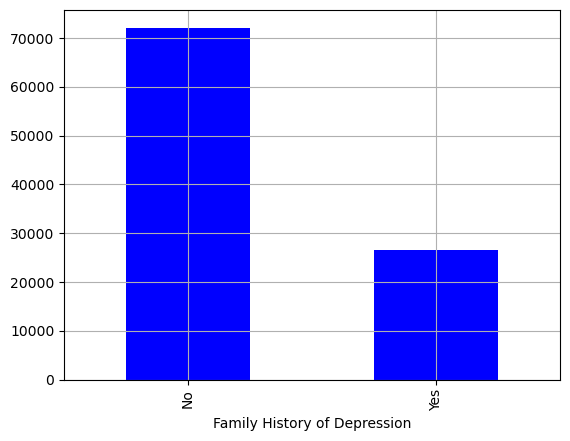

In [66]:
df_cat['Family History of Depression'].value_counts().plot(kind ='bar', color='blue')
plt.grid()
plt.xticks(rotation =90)
plt.show()

**Interpretation**  
- 73,032 people have no family history of depression.  
- 26,968 people have a family history of depression.  

In [67]:
df_cat.columns

Index(['Marital Status', 'Education Level', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

### Chronic Medical Conditions

In [68]:
df_cat['Chronic Medical Conditions'].value_counts()

Chronic Medical Conditions
No     66122
Yes    32641
Name: count, dtype: int64

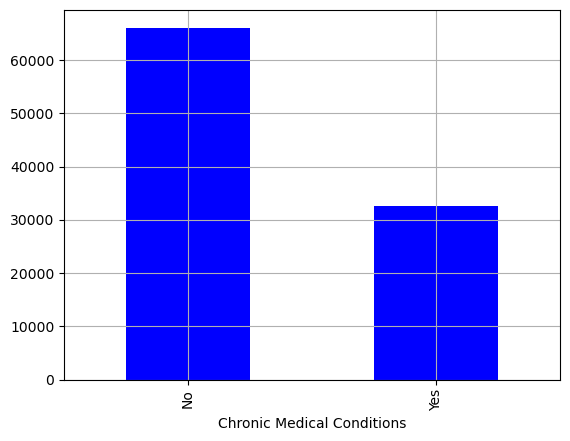

In [69]:
df_cat['Chronic Medical Conditions'].value_counts().plot(kind ='bar', color='blue')
plt.grid()
plt.xticks(rotation =90)
plt.show()

**Interpretation**  
- 66,981 people have no chronic medical conditions.  
- 33,019 people have chronic medical conditions.  

In [70]:
df_cat.columns

Index(['Marital Status', 'Education Level', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

# Bivariate Analysis 

In [71]:
df_cat.columns

Index(['Marital Status', 'Education Level', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

In [72]:
df_num.columns

Index(['Age', 'Number of Children', 'Income'], dtype='object')

In [130]:
# For Finding the pears we need to draw correlation matrix
corr = df_num.corr()

In [131]:
corr


,Age,Number of Children,Income
Age,1.000000,0.267108,-0.079224
Number of Children,0.267108,1.000000,0.025115
Income,-0.079224,0.025115,1.000000


<Axes: >

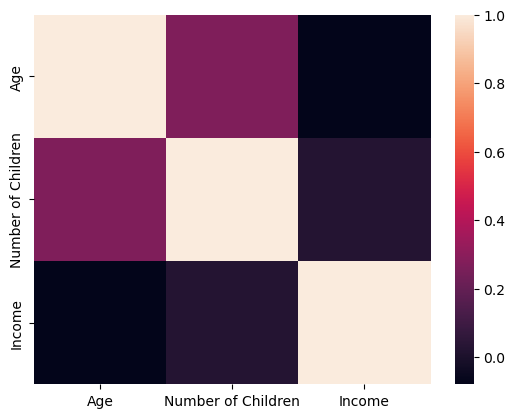

In [132]:
sns.heatmap(corr)

**Interpretation**
 - We don't have any correlated in numerical columns.

#### Bivariate analysis of Age with all categorical columns

#### Marital Status and Age

Text(0.5, 1.0, 'Marital Status vs Age')

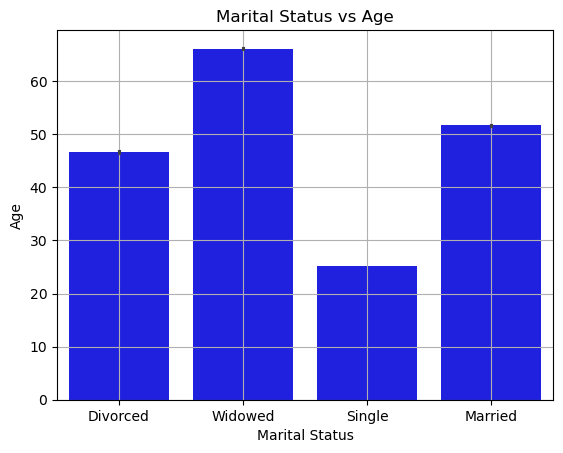

In [74]:
# Plot the bar graph
sns.barplot(x='Marital Status',y='Age',data=df,color='blue',estimator='mean')
plt.grid()
plt.title('Marital Status vs Age')

Text(0.5, 1.0, 'Marital Status vs Age')

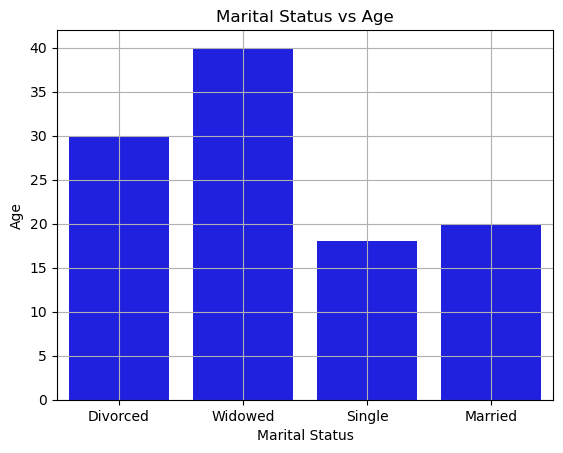

In [75]:
# Plot the bar graph
sns.barplot(x='Marital Status',y='Age',data=df,color='blue',estimator='min')
plt.grid()
plt.title('Marital Status vs Age')

Text(0.5, 1.0, 'Marital Status vs Age')

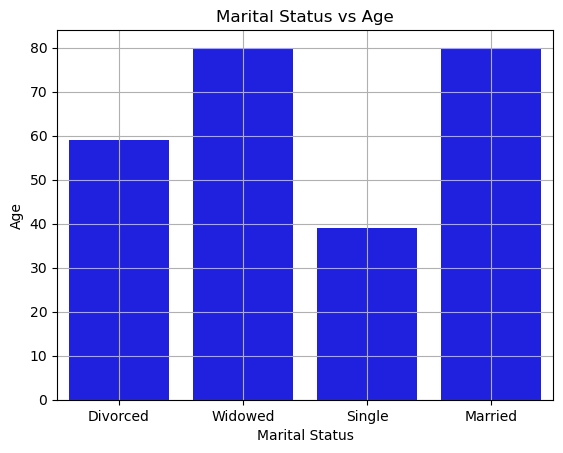

In [76]:
# Plot the bar graph
sns.barplot(x='Marital Status',y='Age',data=df,color='blue',estimator='max')
plt.grid()
plt.title('Marital Status vs Age')

**Interpretation**
- Widoweds with depression have highest average Age
- Singles with depression have lowest average Age

#### 'Education Level','Age'

Text(0, 0.5, 'Age')

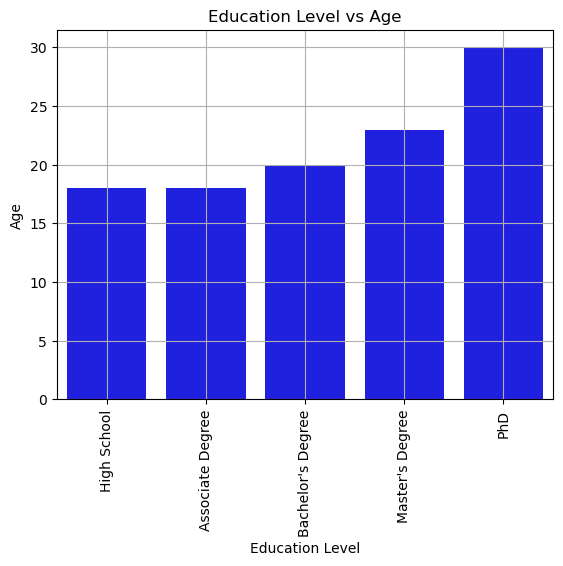

In [77]:
# Plot the bar graph
sns.barplot(x='Education Level',y='Age',data=df,color='blue',estimator='min')
plt.grid()
plt.title('Education Level vs Age')
plt.xticks(rotation=90)
plt.ylabel('Age')

Text(0, 0.5, 'Age')

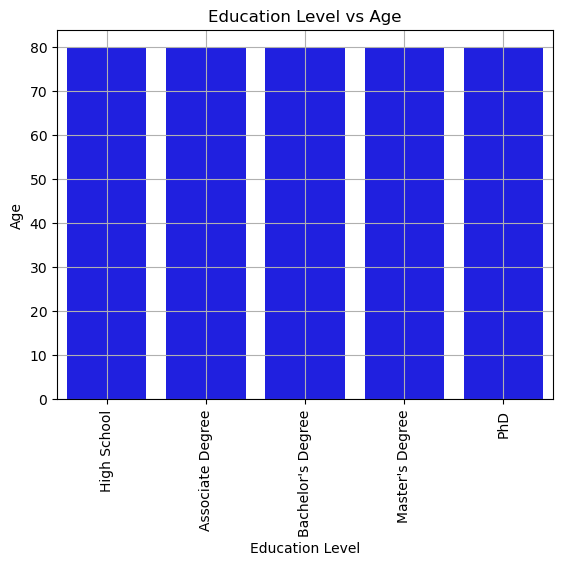

In [78]:
# Plot the bar graph
sns.barplot(x='Education Level',y='Age',data=df,color='blue',estimator='max')
plt.grid()
plt.title('Education Level vs Age')
plt.xticks(rotation=90)
plt.ylabel('Age')

Text(0, 0.5, 'Age')

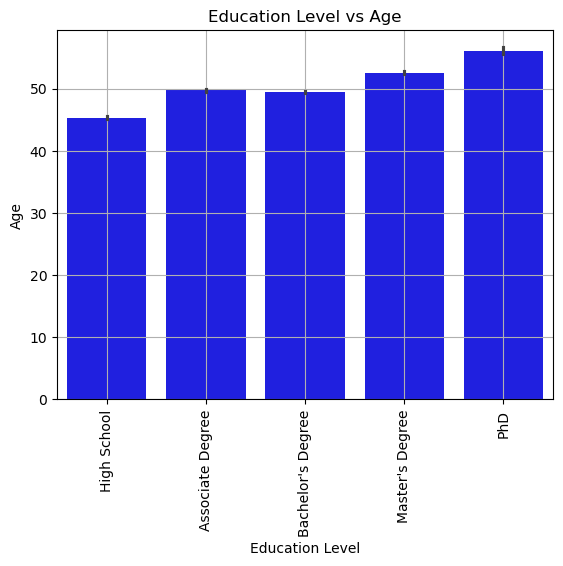

In [79]:
# Plot the bar graph
sns.barplot(x='Education Level',y='Age',data=df,color='blue',estimator='mean')
plt.grid()
plt.title('Education Level vs Age')
plt.xticks(rotation=90)
plt.ylabel('Age')

**Interpretation**
- graph represents the trend of increase in number of person with depression as per increase in level of education

#### Smoking Status and Age

Text(0, 0.5, 'Age')

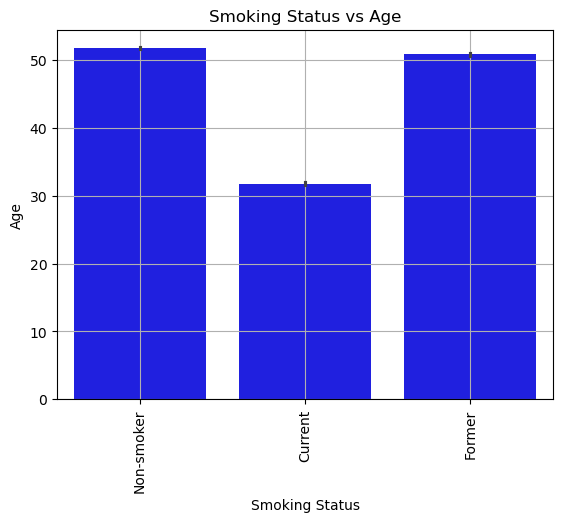

In [80]:
# Plot the bar graph
sns.barplot(x='Smoking Status',y='Age',data=df,color='blue')
plt.grid()
plt.title('Smoking Status vs Age')
plt.xticks(rotation=90)
plt.ylabel('Age')

**Interpretation**
- Non-smoker and former have higher average age (non smoker are slightly higher)
- Current smokers have lower average age

#### Physical Activity Level and Age

Text(0, 0.5, 'Age')

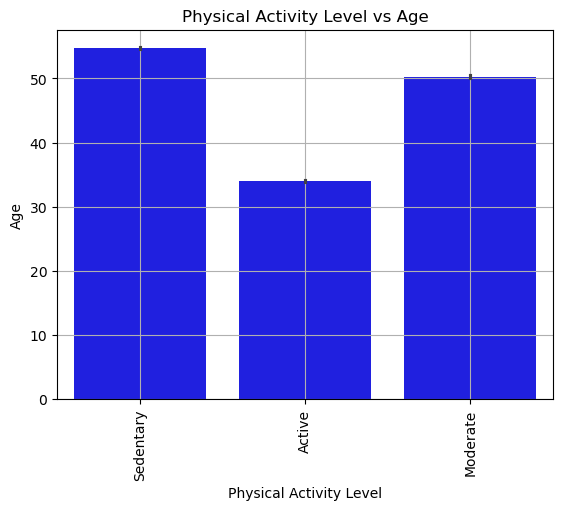

In [81]:
# Plot the bar graph
sns.barplot(x='Physical Activity Level',y='Age',data=df,color='blue',estimator='mean')
plt.grid()
plt.title('Physical Activity Level vs Age')
plt.xticks(rotation=90)
plt.ylabel('Age')

Text(0, 0.5, 'Age')

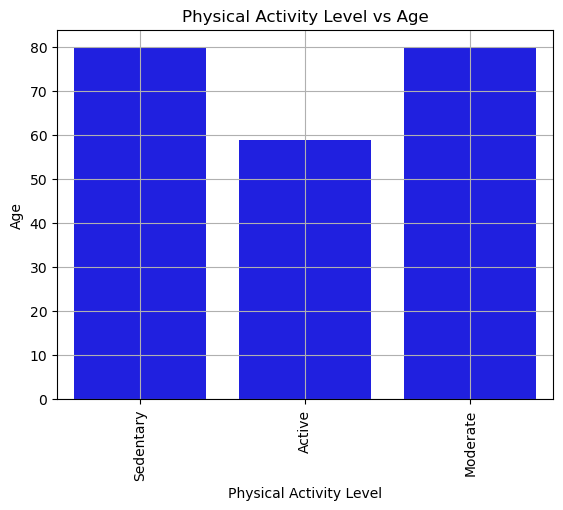

In [82]:
# Plot the bar graph
sns.barplot(x='Physical Activity Level',y='Age',data=df,color='blue',estimator='max')
plt.grid()
plt.title('Physical Activity Level vs Age')
plt.xticks(rotation=90)
plt.ylabel('Age')

Text(0, 0.5, 'Age')

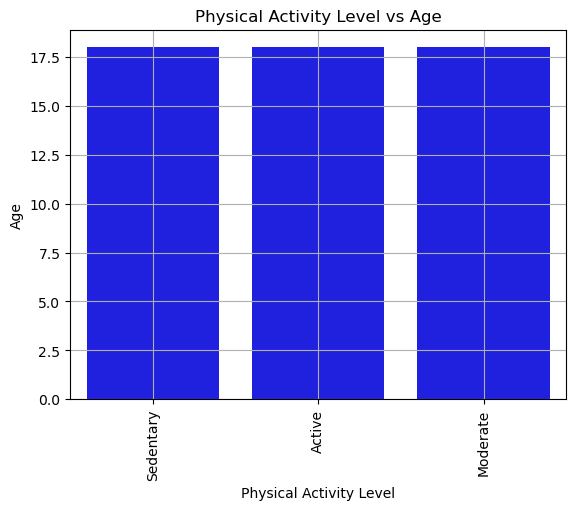

In [83]:
# Plot the bar graph
sns.barplot(x='Physical Activity Level',y='Age',data=df,color='blue',estimator='min')
plt.grid()
plt.title('Physical Activity Level vs Age')
plt.xticks(rotation=90)
plt.ylabel('Age')

**Interpretation**
- Physically Sedentary have higher average age
- Physically Active have lower average age 

#### 'Employment Status','Age'

Text(0, 0.5, 'Age')

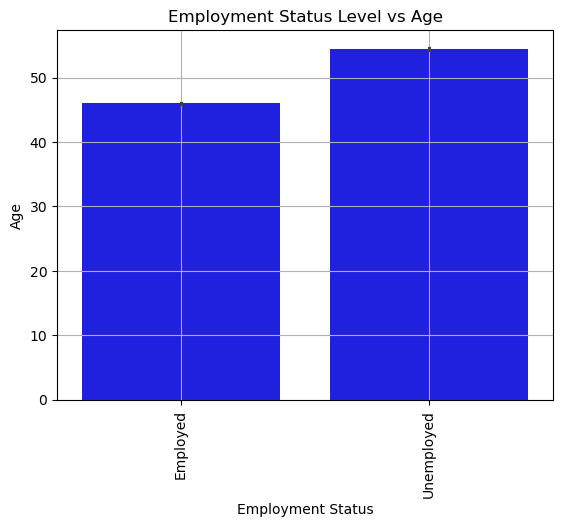

In [84]:
# Plot the bar graph
sns.barplot(x='Employment Status',y='Age',data=df,color='blue')
plt.grid()
plt.title('Employment Status Level vs Age')
plt.xticks(rotation=90)
plt.ylabel('Age')

**Interpretation**
- Unemployed have higher average age
- Employed have lower average age

#### Alcohol Consumption and Age

Text(0, 0.5, 'Age')

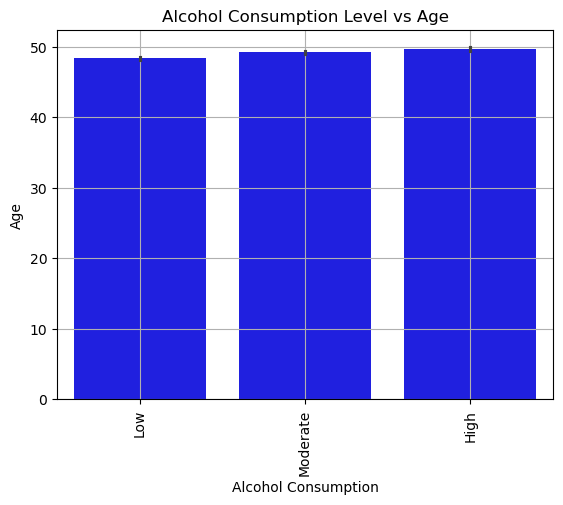

In [85]:
# Plot the bar graph
sns.barplot(x='Alcohol Consumption',y='Age',data=df,color='blue',estimator='mean')
plt.grid()
plt.title('Alcohol Consumption Level vs Age')
plt.xticks(rotation=90)
plt.ylabel('Age')

**Interpretation**
- High Alcohol Consumption have highest average age 
- low Alcohol Consumption have lowestest average age 

#### Dietary Habits and Age

Text(0, 0.5, 'Age')

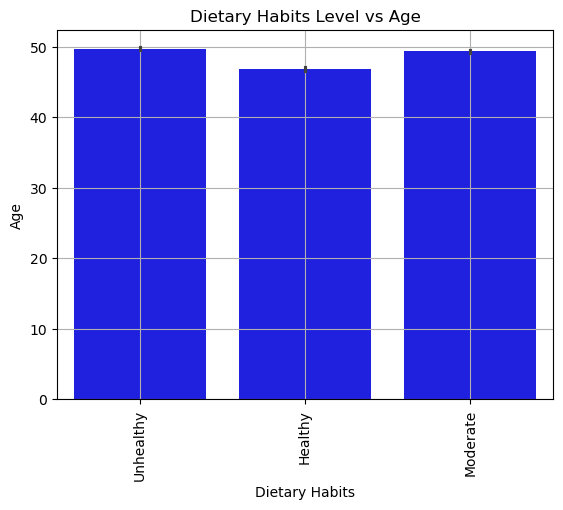

In [86]:
# Plot the bar graph
sns.barplot(x='Dietary Habits',y='Age',data=df,color='blue',estimator='mean')
plt.grid()
plt.title('Dietary Habits Level vs Age')
plt.xticks(rotation=90)
plt.ylabel('Age')

**Interpretation**
- Healthy Dietary have lowestest average age 
- Unhealthy Dietary have highest average age 

#### Sleep Patterns and Age

Text(0, 0.5, 'Age')

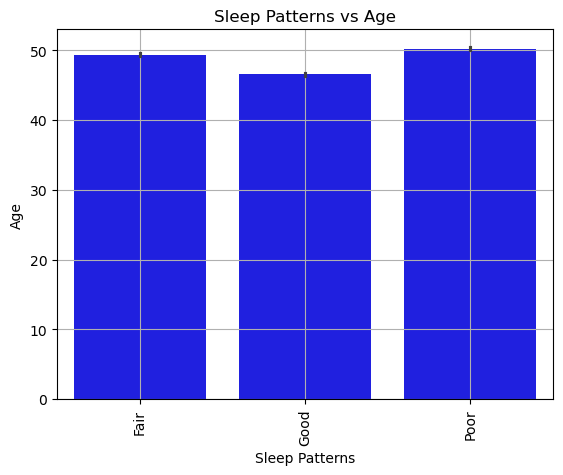

In [87]:
# Plot the bar graph
sns.barplot(x='Sleep Patterns',y='Age',data=df,color='blue')
plt.grid()
plt.title('Sleep Patterns vs Age')
plt.xticks(rotation=90)
plt.ylabel('Age')

**Interpretation**
- Fair and poor sleep patterned people have around 50 average age
- Good sleep pattern people have low average age

#### History of Mental Illness and Age

Text(0, 0.5, 'Age')

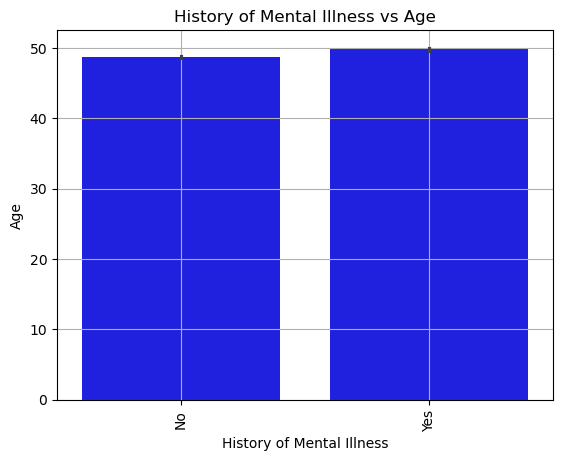

In [88]:
# Plot the bar graph
sns.barplot(x='History of Mental Illness',y='Age',data=df,color='blue')
plt.grid()
plt.title('History of Mental Illness vs Age')
plt.xticks(rotation=90)
plt.ylabel('Age')

**Interpretation**
- People with history of illness have high average age compare to people with no history of illness

#### History of Substance Abuse and Age 

Text(0, 0.5, 'Age')

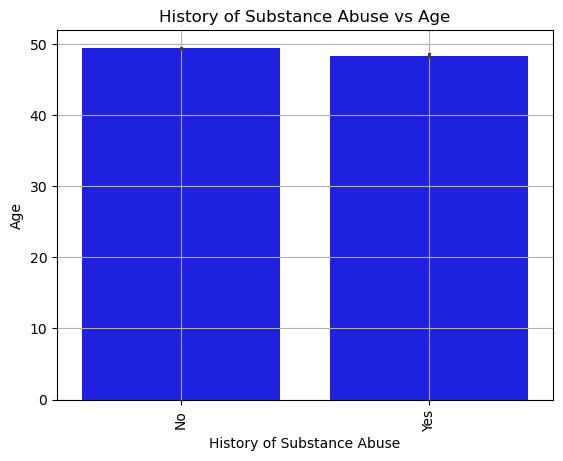

In [89]:
# Plot the bar graph
sns.barplot(x='History of Substance Abuse',y='Age',data=df,color='blue')
plt.grid()
plt.title('History of Substance Abuse vs Age')
plt.xticks(rotation=90)
plt.ylabel('Age')

**Interpretation**
- People with no history of Substance Abuse have higher average age compare to people with history of substance abuse

#### Family History of Depression and Age

Text(0, 0.5, 'Age')

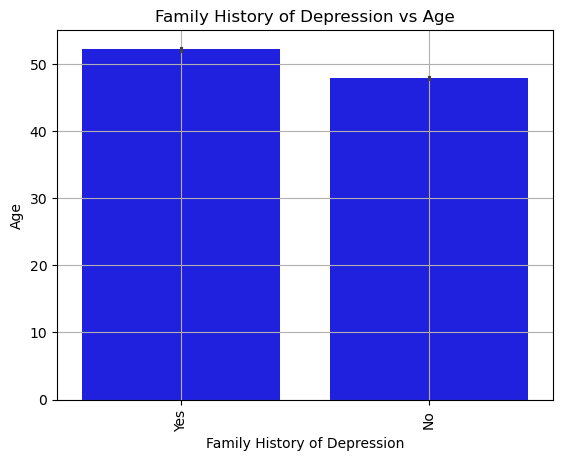

In [90]:
# Plot the bar graph
sns.barplot(x='Family History of Depression',y='Age',data=df,color='blue')
plt.grid()
plt.title('Family History of Depression vs Age')
plt.xticks(rotation=90)
plt.ylabel('Age')

**Interpretation**
- People with Family History of Depression have higher average age compare to people with not a Family History of depression

#### Chronic Medical Conditions and Age

Text(0, 0.5, 'Age')

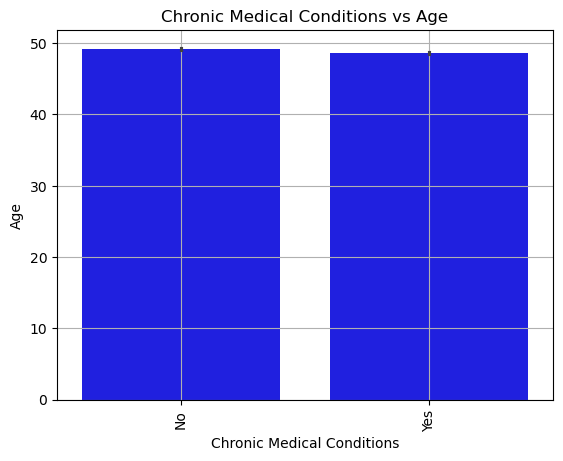

In [91]:
# Plot the bar graph
sns.barplot(x='Chronic Medical Conditions',y='Age',data=df,color='blue')
plt.grid()
plt.title('Chronic Medical Conditions vs Age')
plt.xticks(rotation=90)
plt.ylabel('Age')

**Interpretation**
- People with and without chornical disease have similar average age

In [92]:
df_cat.columns

Index(['Marital Status', 'Education Level', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

In [93]:
df_num.columns

Index(['Age', 'Number of Children', 'Income'], dtype='object')

#### Bivariate analysis of Number of Children with all categorical columns

#### Marital Status and Number of Children

Text(0, 0.5, 'Number of Children')

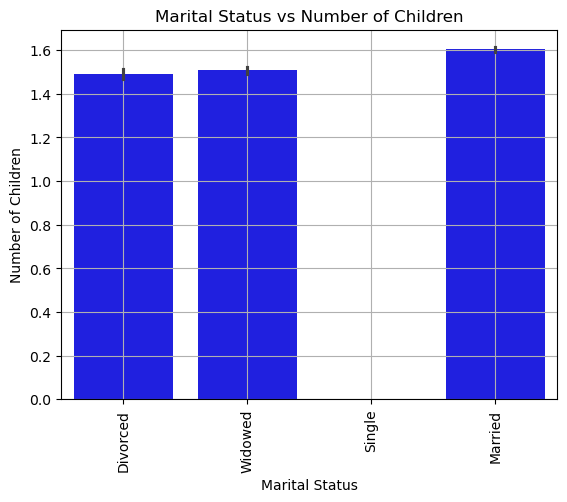

In [94]:
# Plot the bar graph
sns.barplot(x='Marital Status',y='Number of Children',data=df,color='blue',estimator='mean')
plt.grid()
plt.title('Marital Status vs Number of Children')
plt.xticks(rotation=90)
plt.ylabel('Number of Children')

Text(0, 0.5, 'Number of Children')

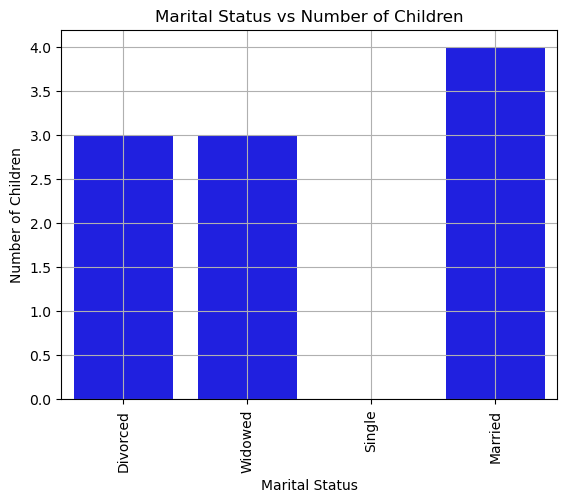

In [95]:
# Plot the bar graph
sns.barplot(x='Marital Status',y='Number of Children',data=df,color='blue',estimator='max')
plt.grid()
plt.title('Marital Status vs Number of Children')
plt.xticks(rotation=90)
plt.ylabel('Number of Children')

Text(0, 0.5, 'Number of Children')

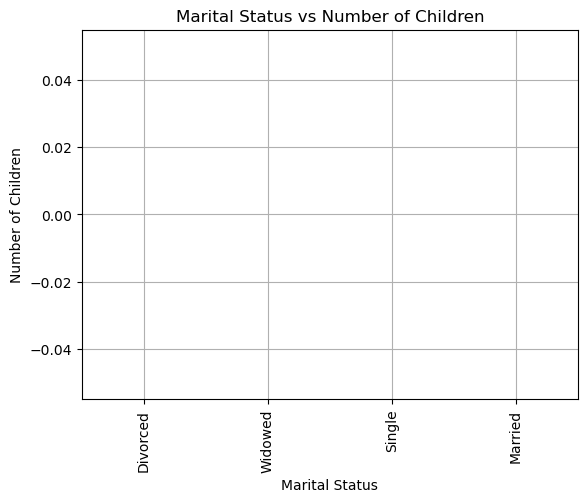

In [96]:
# Plot the bar graph
sns.barplot(x='Marital Status',y='Number of Children',data=df,color='blue',estimator='min')
plt.grid()
plt.title('Marital Status vs Number of Children')
plt.xticks(rotation=90)
plt.ylabel('Number of Children')

**Interpretation**
- Married people have highest average for number of children
- Singles have no child
- married people have maximum 4 children
- Divorced and widows have maximum 3 children

#### Education Level and Number of Children

Text(0, 0.5, 'Number of children')

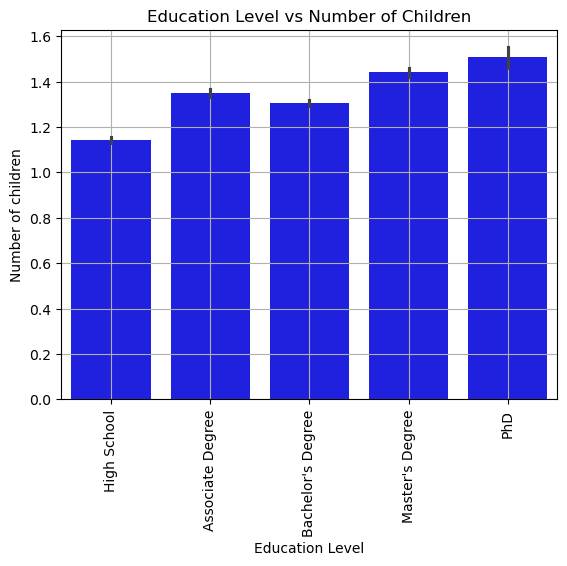

In [97]:
# Plot the bar graph
sns.barplot(x='Education Level',y='Number of Children',data=df,color='blue',estimator='mean')
plt.grid()
plt.title('Education Level vs Number of Children')
plt.xticks(rotation=90)
plt.ylabel('Number of children')

Text(0, 0.5, 'Number of children')

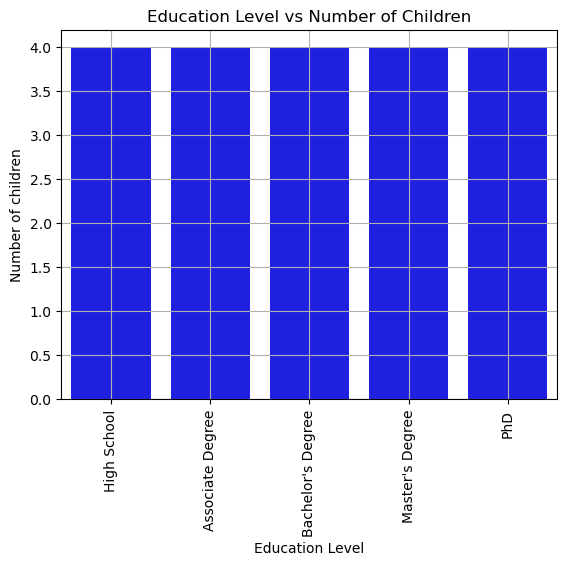

In [98]:
# Plot the bar graph
sns.barplot(x='Education Level',y='Number of Children',data=df,color='blue',estimator='max')
plt.grid()
plt.title('Education Level vs Number of Children')
plt.xticks(rotation=90)
plt.ylabel('Number of children')

Text(0, 0.5, 'Number of children')

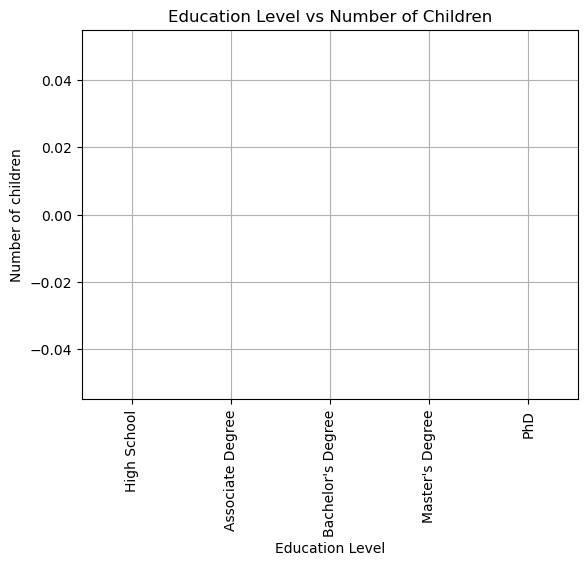

In [99]:
# Plot the bar graph
sns.barplot(x='Education Level',y='Number of Children',data=df,color='blue',estimator='min')
plt.grid()
plt.title('Education Level vs Number of Children')
plt.xticks(rotation=90)
plt.ylabel('Number of children')

**Interpretation**
- PhD students have highest average and high School student have the lowest average number of children
- Maximum number of children is same in all the levels of education

#### Smoking Status and Number of Children

Text(0, 0.5, 'Number of Children')

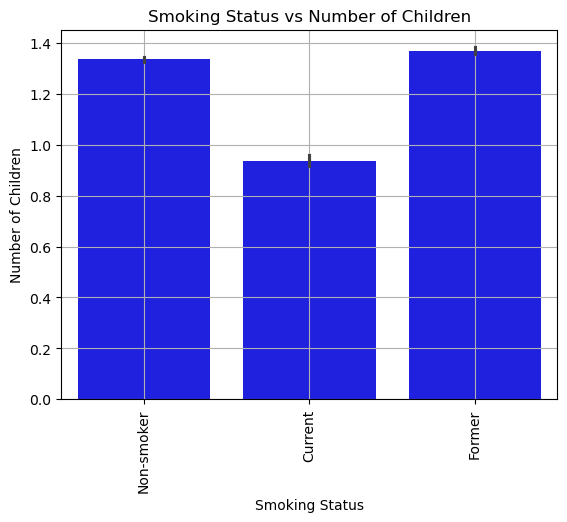

In [100]:
# Plot the bar graph
sns.barplot(x='Smoking Status',y='Number of Children',data=df,color='blue',estimator='mean')
plt.grid()
plt.title('Smoking Status vs Number of Children')
plt.xticks(rotation=90)
plt.ylabel('Number of Children')

Text(0, 0.5, 'Number of Children')

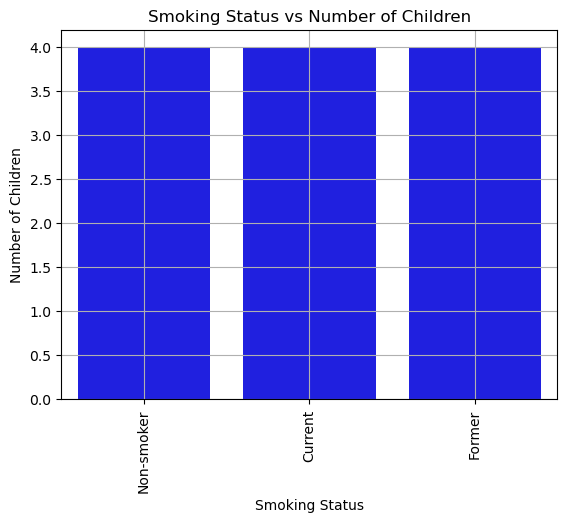

In [101]:
# Plot the bar graph
sns.barplot(x='Smoking Status',y='Number of Children',data=df,color='blue',estimator='max')
plt.grid()
plt.title('Smoking Status vs Number of Children')
plt.xticks(rotation=90)
plt.ylabel('Number of Children')

Text(0, 0.5, 'Number of Children')

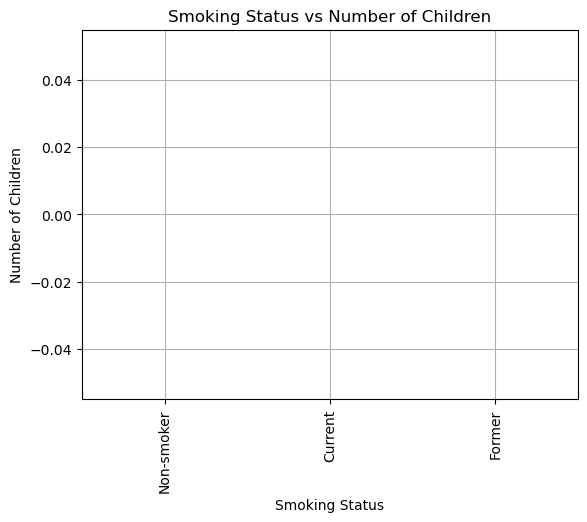

In [102]:
# Plot the bar graph
sns.barplot(x='Smoking Status',y='Number of Children',data=df,color='blue',estimator='min')
plt.grid()
plt.title('Smoking Status vs Number of Children')
plt.xticks(rotation=90)
plt.ylabel('Number of Children')

**Interpretation**
- Fomer smokers and non smokers have similar average
- Current somkers have lowest average 

#### Physical Activity Level and Number of Children

Text(0, 0.5, 'Number of children')

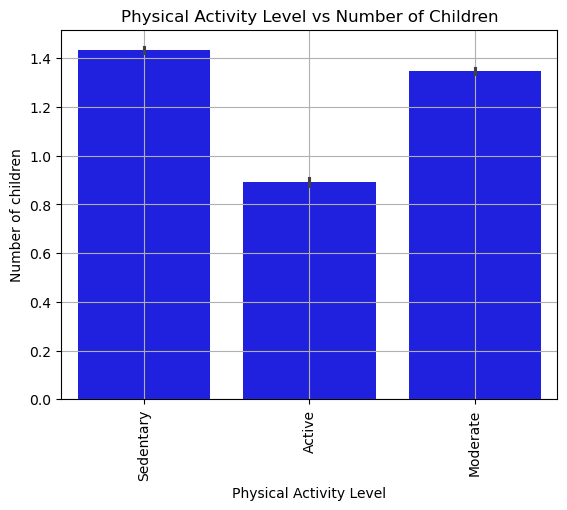

In [103]:
# Plot the bar graph
sns.barplot(x='Physical Activity Level',y='Number of Children',data=df,color='blue',estimator='mean')
plt.grid()
plt.title('Physical Activity Level vs Number of Children')
plt.xticks(rotation=90)
plt.ylabel('Number of children')

**Interpretation**
- Physically sedentary people have highest average number of children
- Physically active people have lowest average number of children

#### Employment Status and Number of Children

Text(0, 0.5, 'Number od children')

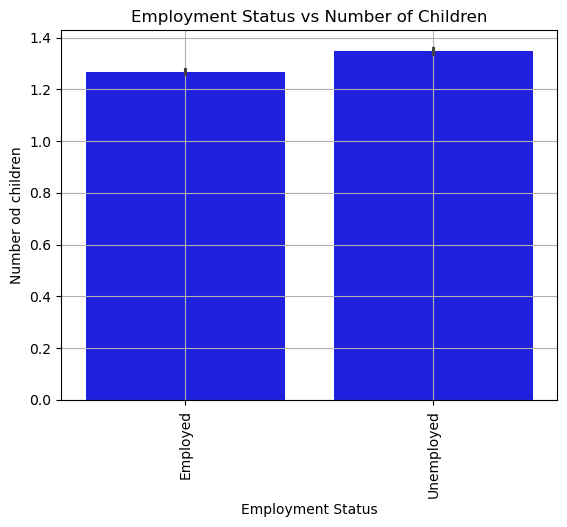

In [104]:
# Plot the bar graph
sns.barplot(x='Employment Status',y='Number of Children',data=df,color='blue')
plt.grid()
plt.title('Employment Status vs Number of Children')
plt.xticks(rotation=90)
plt.ylabel('Number od children')

**Interpretation**
- Unemployed people have higher average number of children compare to unemployed

#### Alcohol Consumption and Number of Children

Text(0, 0.5, 'Number of Children')

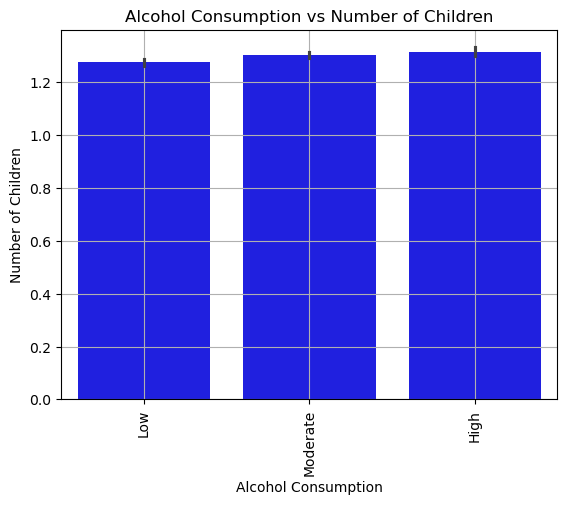

In [105]:
# Plot the bar graph
sns.barplot(x='Alcohol Consumption',y='Number of Children',data=df,color='blue')
plt.grid()
plt.title('Alcohol Consumption vs Number of Children')
plt.xticks(rotation=90)
plt.ylabel('Number of Children')

**Interpretation**
- Average of number of children is similar in all types of consumer

#### Dietary Habits and Number of Children

Text(0, 0.5, 'Numer of Children')

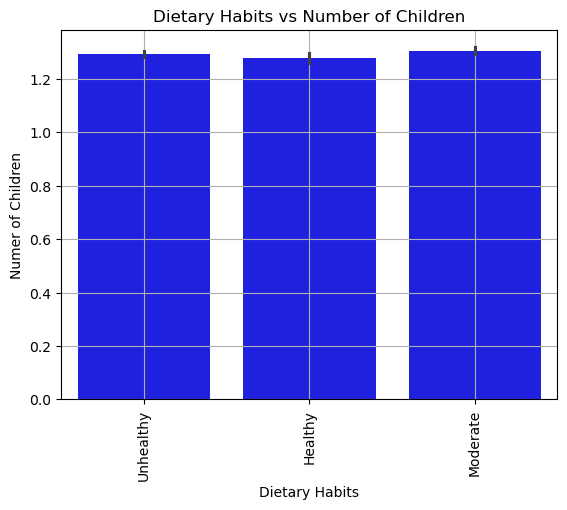

In [106]:
# Plot the bar graph
sns.barplot(x='Dietary Habits',y='Number of Children',data=df,color='blue')
plt.grid()
plt.title('Dietary Habits vs Number of Children')
plt.xticks(rotation=90)
plt.ylabel('Numer of Children')

**Interpretation**
- Average of number of children is same for people with any type of Dietary habits

#### Sleep Patterns and Number of Children

Text(0, 0.5, 'Number of Children')

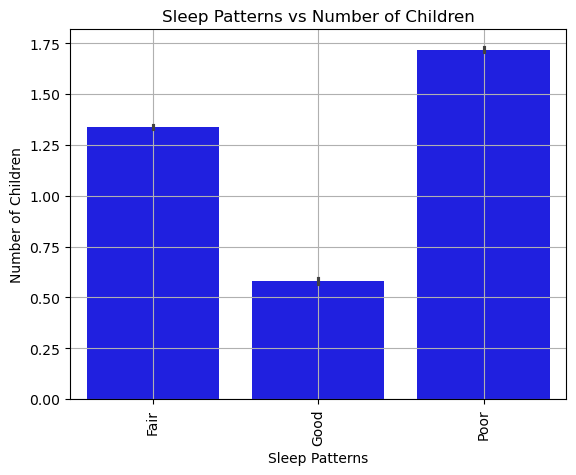

In [107]:
# Plot the bar graph
sns.barplot(x='Sleep Patterns',y='Number of Children',data=df,color='blue',estimator='mean')
plt.grid()
plt.title('Sleep Patterns vs Number of Children')
plt.xticks(rotation=90)
plt.ylabel('Number of Children')

**Interpretation**
- People with poor sleep pattern have highest average of number of children
- People with good sleep pattern have lowest average of number of children

#### History of Mental Illness and Number of Children

Text(0, 0.5, 'Number of Children')

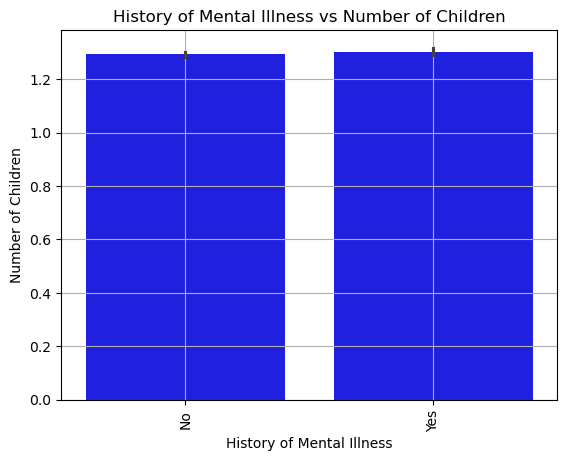

In [108]:
# Plot the bar graph
sns.barplot(x='History of Mental Illness',y='Number of Children',data=df,color='blue')
plt.grid()
plt.title('History of Mental Illness vs Number of Children')
plt.xticks(rotation=90)
plt.ylabel('Number of Children')

**Interpretation**
- People with and without History of illness have similar average of number of children

#### History of Substance Abuse and Number of Children

Text(0, 0.5, 'Number of Children')

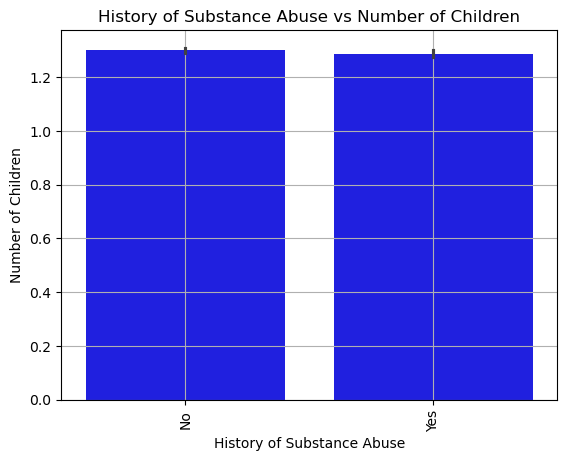

In [109]:
# Plot the bar graph
sns.barplot(x='History of Substance Abuse',y='Number of Children',data=df,color='blue')
plt.grid()
plt.title('History of Substance Abuse vs Number of Children')
plt.xticks(rotation=90)
plt.ylabel('Number of Children')

**Interpretation**
- People with and without History of Substance have similar average of number of children

#### Family History of Depression and Number of Children

Text(0, 0.5, 'Number of Children')

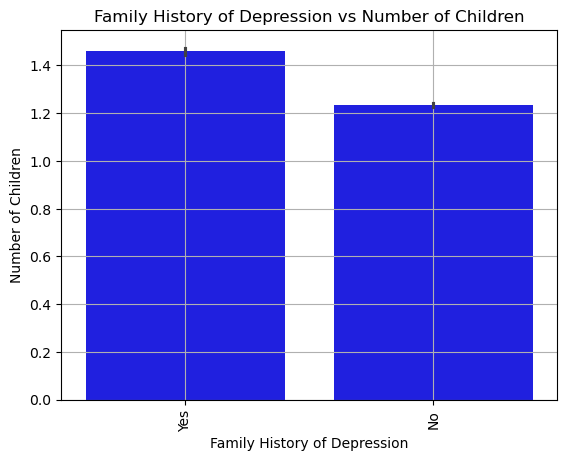

In [110]:
# Plot the bar graph
sns.barplot(x='Family History of Depression',y='Number of Children',data=df,color='blue')
plt.grid()
plt.title('Family History of Depression vs Number of Children')
plt.xticks(rotation=90)
plt.ylabel('Number of Children')

**Interpretation**
- People with Family History of Depression have higher average number of children compare to people without it

#### Chronic Medical Conditions and Number of Children

Text(0, 0.5, 'Number of Children')

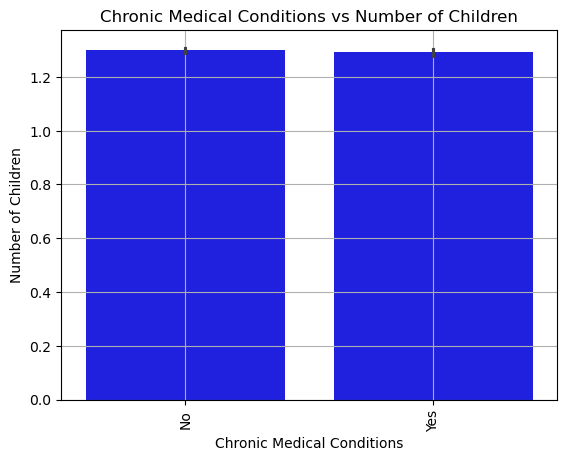

In [111]:
# Plot the bar graph
sns.barplot(x='Chronic Medical Conditions',y='Number of Children',data=df,color='blue')
plt.grid()
plt.title('Chronic Medical Conditions vs Number of Children')
plt.xticks(rotation=90)
plt.ylabel('Number of Children')

**Interpretation**
- People with and without Chronic Medical Condition have same average number of children

In [112]:
df_cat.columns

Index(['Marital Status', 'Education Level', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

In [113]:
df_num.columns

Index(['Age', 'Number of Children', 'Income'], dtype='object')

#### Bivariate analysis of Number of Children with all categorical columns

#### 'Marital Status','Income'

Text(0, 0.5, 'Income')

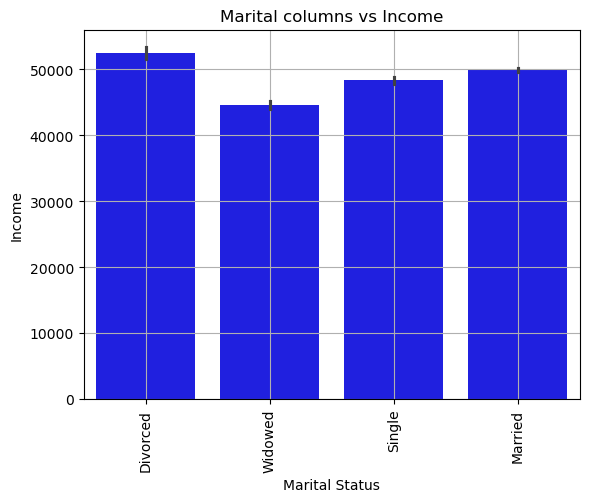

In [114]:
# Plot the bar graph
sns.barplot(x='Marital Status',y='Income',data=df,color='blue',estimator='mean')
plt.grid()
plt.title('Marital columns vs Income')
plt.xticks(rotation=90)
plt.ylabel('Income')

**Interpretation**
- Divorced people have highest average income
- Widowed people have lowest average income

#### Education Level and Income

Text(0, 0.5, 'Income')

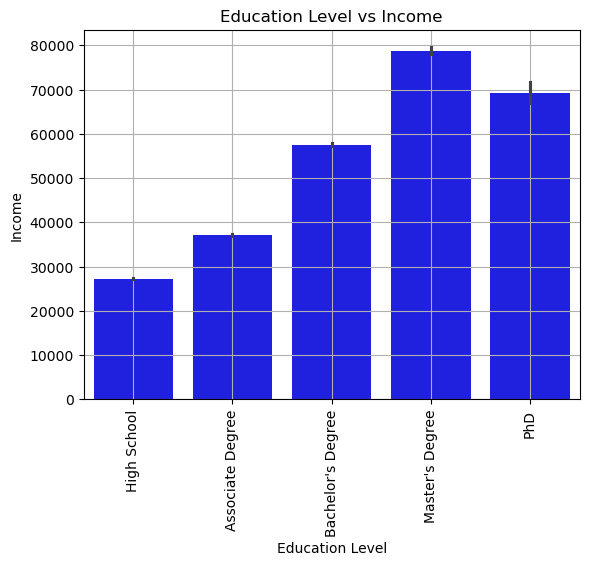

In [115]:
# Plot the bar graph
sns.barplot(x='Education Level',y='Income',data=df,color='blue')
plt.grid()
plt.title('Education Level vs Income')
plt.xticks(rotation=90)
plt.ylabel('Income')

**Interpretation**
- People with masters degree have highest average income
- People with high school education have lowest average income

#### Smoking Status and Income

Text(0, 0.5, 'Income')

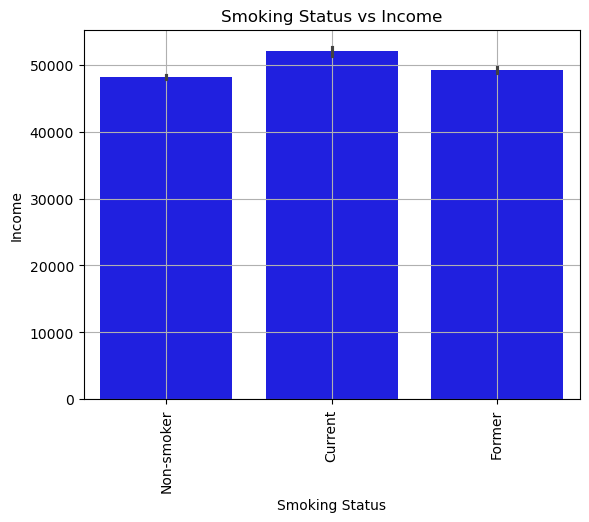

In [116]:
# Plot the bar graph
sns.barplot(x='Smoking Status',y='Income',data=df,color='blue')
plt.grid()
plt.title('Smoking Status vs Income')
plt.xticks(rotation=90)
plt.ylabel('Income')

**Interpretation**
- Current smokers have highest average income
- Non smoker and former smokers have similar average(Former smoker average is slightly higher)

#### Physical Activity Level and Income

Text(0, 0.5, 'Income')

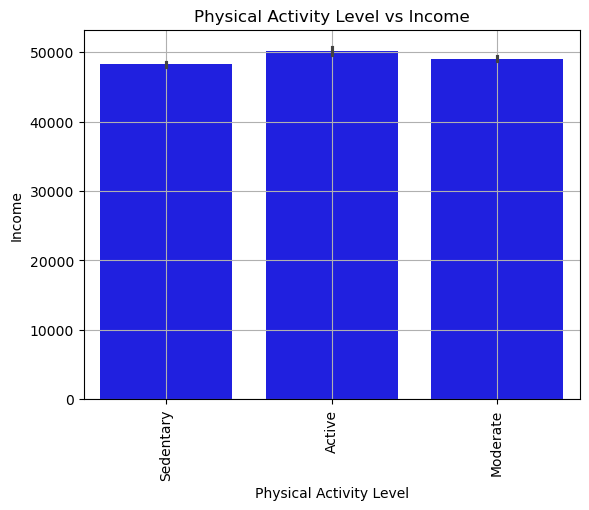

In [117]:
# Plot the bar graph
sns.barplot(x='Physical Activity Level',y='Income',data=df,color='blue')
plt.grid()
plt.title('Physical Activity Level vs Income')
plt.xticks(rotation=90)
plt.ylabel('Income')

**Interpretation**
- Average income as per physical activity has no significant difference
- Physically active person have highest and physically sedentary have lowest

#### Employment Status and Income

Text(0, 0.5, 'Income')

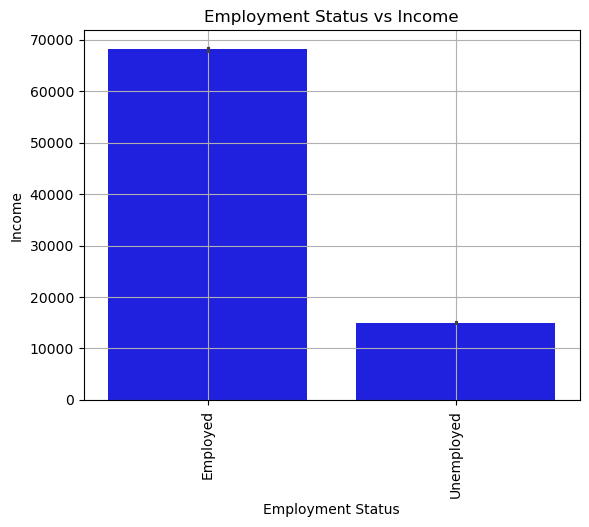

In [118]:
# Plot the bar graph
sns.barplot(x='Employment Status',y='Income',data=df,color='blue')
plt.grid()
plt.title('Employment Status vs Income')
plt.xticks(rotation=90)
plt.ylabel('Income')

**Interpretation**
- There is a drastic difference between in average income of employyed and unemployed people.
- Employed person have average income around 70000
- Unemployed person have average income around 15000

#### Alcohol Consumption and Income

Text(0, 0.5, 'Income')

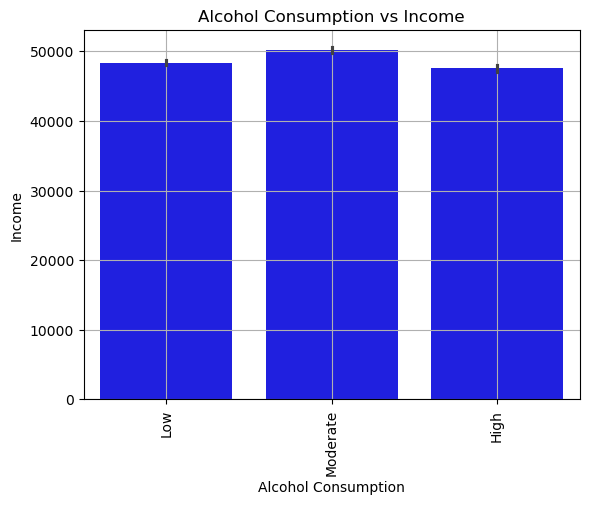

In [119]:
# Plot the bar graph
sns.barplot(x='Alcohol Consumption',y='Income',data=df,color='blue')
plt.grid()
plt.title('Alcohol Consumption vs Income')
plt.xticks(rotation=90)
plt.ylabel('Income')

**Interpretation**
- Moderate alcohol consumers have highest average income
- Low and high alcohol consumers have similar average income

#### Dietary Habits and Income

Text(0, 0.5, 'Income')

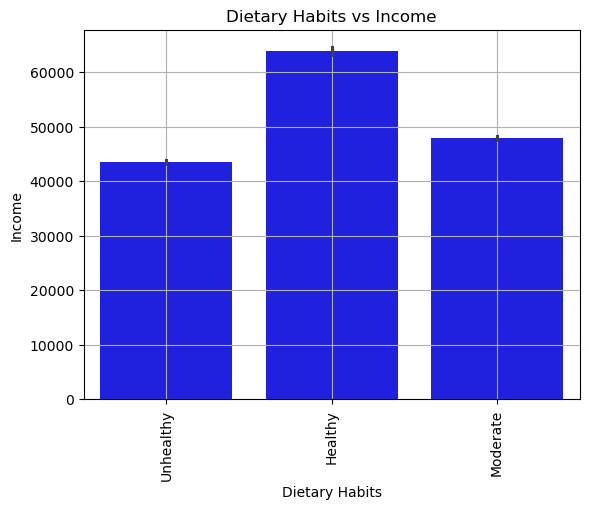

In [120]:
# Plot the bar graph
sns.barplot(x='Dietary Habits',y='Income',data=df,color='blue')
plt.grid()
plt.title('Dietary Habits vs Income')
plt.xticks(rotation=90)
plt.ylabel('Income')

**Interpretation**
- people with Healthy dietary habits have highest average income
- people with unhealthy dietary habits have lowest average income

#### Sleep Patterns and Income

Text(0, 0.5, 'Income')

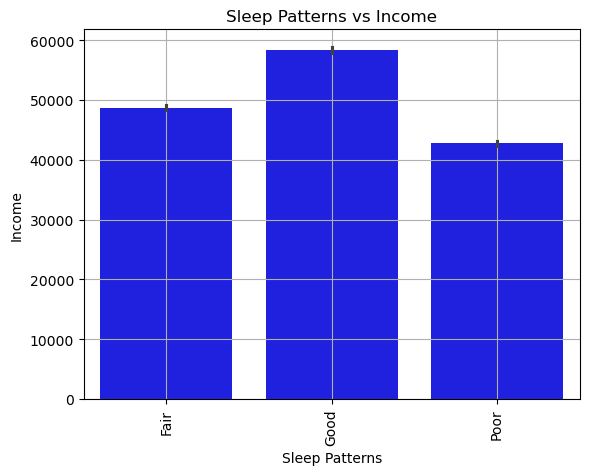

In [121]:
# Plot the bar graph
sns.barplot(x='Sleep Patterns',y='Income',data=df,color='blue')
plt.grid()
plt.title('Sleep Patterns vs Income')
plt.xticks(rotation=90)
plt.ylabel('Income')

**Interpretation**
- People with good sleep pattern have highest average income
- People with poor sleep pattern have lowest average income

#### History of Mental Illness and Income

Text(0, 0.5, 'Income')

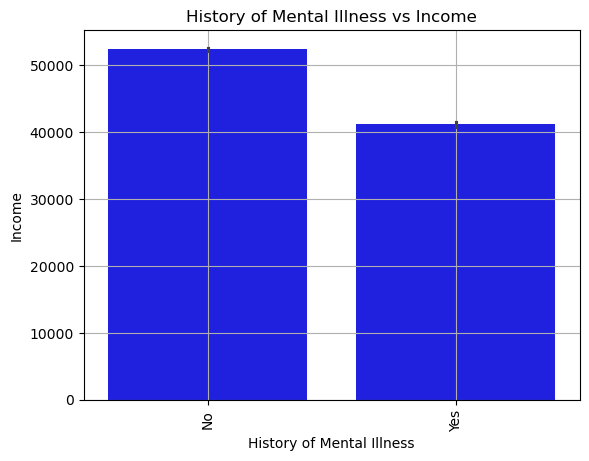

In [122]:
# Plot the bar graph
sns.barplot(x='History of Mental Illness',y='Income',data=df,color='blue')
plt.grid()
plt.title('History of Mental Illness vs Income')
plt.xticks(rotation=90)
plt.ylabel('Income')

**Interpretation**
- People with no history of mental illness have average income a above 50000
- People with history of mental illness have average income a above 40000


#### History of Substance Abuse and Income

Text(0, 0.5, 'Income')

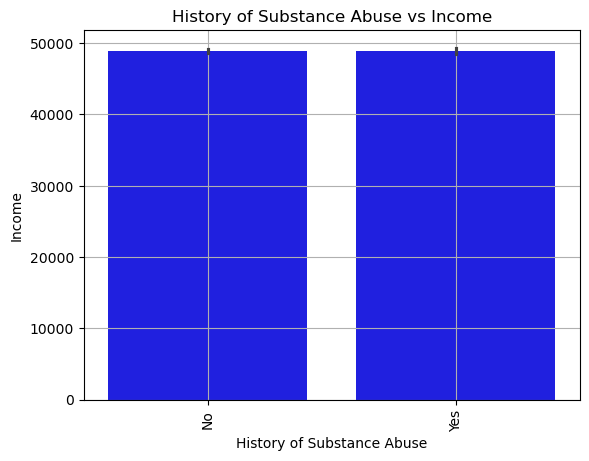

In [123]:
# Plot the bar graph
sns.barplot(x='History of Substance Abuse',y='Income',data=df,color='blue')
plt.grid()
plt.title('History of Substance Abuse vs Income')
plt.xticks(rotation=90)
plt.ylabel('Income')

**Interpretaion**
- People with and without history of substance abuse have same average income

#### Family History of Depression and Income

Text(0, 0.5, 'Income')

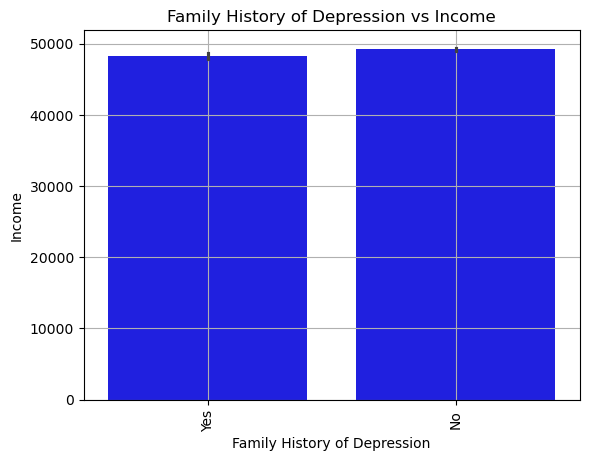

In [124]:
# Plot the bar graph
sns.barplot(x='Family History of Depression',y='Income',data=df,color='blue')
plt.grid()
plt.title('Family History of Depression vs Income')
plt.xticks(rotation=90)
plt.ylabel('Income')

**Interpretation**
- People without Family History of Depression have slightly higher average income comare to people with Family History of Depression

#### Chronic Medical Conditions and Income

Text(0, 0.5, 'Income')

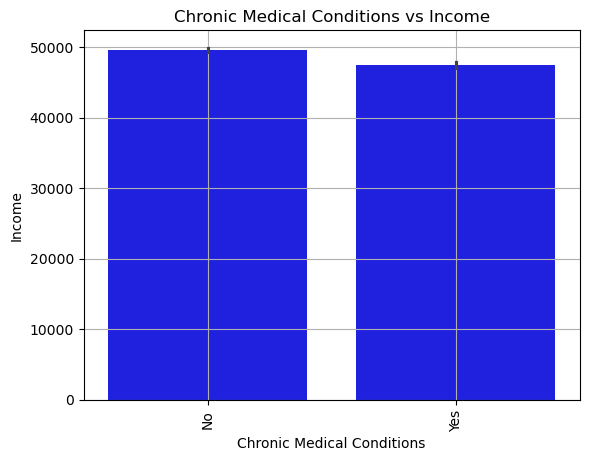

In [125]:
# Plot the bar graph
sns.barplot(x='Chronic Medical Conditions',y='Income',data=df,color='blue')
plt.grid()
plt.title('Chronic Medical Conditions vs Income')
plt.xticks(rotation=90)
plt.ylabel('Income')

**Interpretation**
- People with Chronic Medical Condition have higher average income compare to the people with Chronic Medical Conditions

# Summary

1. Possible age range to acquire depression is 18 to 80
2. Married person have highest the highest to acquire depression and divorced person have lower possibility
3. People with high school education and Bachelor degree are highest number of people with depression 
4. Majority of people are non smokers
5. People with sedentary physcial activity are more proned to be depress
6. Employed are more depressed than unemployed person
7. People with high alocohol consumption are the least depressed and moderate consumers are the most depressed
8. People with healthy diet have the least possibility to get depressed while people with unhealthy and moderate diet have highest possibility
9. People with Good sleep pattern have the least possibility to get depressed
10. People with no history of  mental illness are the most depressed
11. People with no history of substance abuse are the most depressed
12. Number of people with no Family history of depression and no Chronic Medical Condition are high